initial_accuracy: 0.0909
epoch: 0 accuracy: 0.9576
epoch: 1 accuracy: 0.9612
epoch: 2 accuracy: 0.9701
epoch: 3 accuracy: 0.9696
epoch: 4 accuracy: 0.9681
epoch: 5 accuracy: 0.9718
epoch: 6 accuracy: 0.9713
epoch: 7 accuracy: 0.9742
epoch: 8 accuracy: 0.9762
epoch: 9 accuracy: 0.977


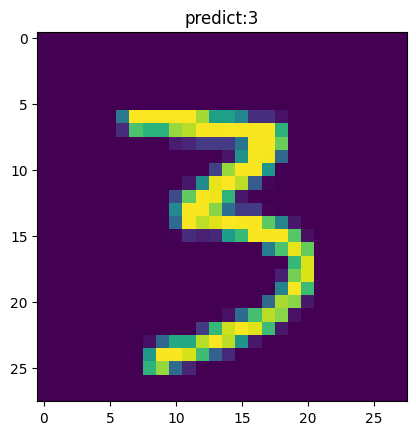

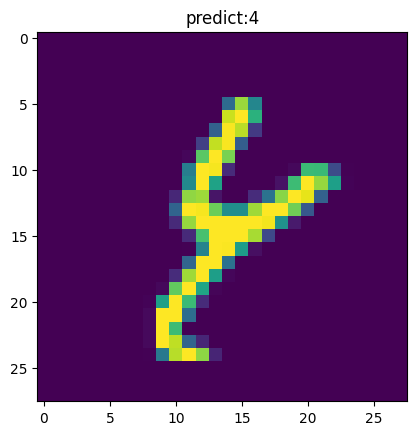

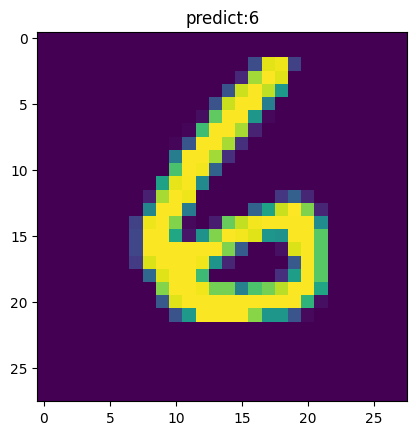

In [ ]:
from matplotlib import pyplot as plt
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
# 定义神经网络的主体结构
class Net(torch.nn.Module): # torch.nn.Module 是一个模板
# 初始化神经网络的层结构
    def __init__(self):
        super().__init__() #调用父类（torch.nn.Module）的初始化方法，确保模块能正常工作
        self.fc1 = torch.nn.Linear(28*28,64) # MNIST图像是28*28的灰度图，所以输入层有28*28个神经元 把这些都放在64个精进的神经元里面
        self.fc2 = torch.nn.Linear(64,64) # 64个输入，64个输出 第2次精进
        self.fc3 = torch.nn.Linear(64,64) # 64个输入，64个输出 第3次精进
        self.fc4 = torch.nn.Linear(64,10) # 64个输入，10个输出 第4次精进 最后输出10个类别的概率

    def forward(self,x): # 左边是输入 右边是输出 forward往右边传
        x = torch.nn.functional.relu(self.fc1(x)) # 第1次精进 用ReLU激活函数
        x = torch.nn.functional.relu(self.fc2(x)) # 第2次精进 用ReLU激活函数
        x = torch.nn.functional.relu(self.fc3(x)) # 第3次精进 用ReLU激活函数
        x = torch.nn.functional.log_softmax(self.fc4(x),dim=1) # 第4次精进 直接采用log_softmax函数
        # 写给自己 归一化最后负取对 是因为e^x/Σe^x得到的数据都小于1 则取对后必然是小于0的 而概率越高 取对后就会越大 越趋近于0 便于ai计算
        return x

# 获取像素图片  
def get_data_loader(is_train=True): #is_train=True 表示训练集 否则表示测试集 由MNIST本身定义决定是否是训练集
    to_tenser = transforms.Compose([transforms.ToTensor()]) # 把图片转换为张量
    data_set = MNIST("", is_train, transform=to_tenser, download=True) # 下载数据集
    return DataLoader(data_set, batch_size=15, shuffle=True) # 每次取15个样本 随机打乱 返回数据加载器DataLoader

#神经网络评估
def evaluate(test_data, net): 
    n_correct = 0 # 正确分类的样本数
    n_total = 0 # 总样本数
    with torch.no_grad(): # 评估时不计算梯度(比如导数) 节省内存
        for (x,y) in test_data: # x,y 由MNIST决定 单张图片 单个标签(0123456789) test_data来自data_loader
                                # x表示图像像素矩阵值，y表示图像对应的标签也就是表达的数字
            outputs = net.forward(x.view(-1,28*28)) # -1是自动识别数量 28*28 一维化 将其整理为一行784个像素点
                                                    # 这里的话直接走完整个神经网络了 得到取对归一化的结果
            for i , output in enumerate(outputs): # i 是索引 output是输出的10个类别的概率
                if torch.argmax(output) == y[i] : # 如果预测的类别和真实的类别相同
                    n_correct += 1 # 正确分类的样本数加1
                n_total += 1 # 总样本数加1
        return n_correct/n_total # 返回准确率

def main():
    
    train_data = get_data_loader(is_train=True) # 获取训练集数据加载器
    test_data = get_data_loader(is_train=False) # 获取测试集数据加载器
    net = Net() # 初始化神经网络

    print('initial_accuracy:',evaluate(test_data, net)) # 打印初始准确率
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # 定义优化器 学习率0.001
    for epoch in range(2):
        # 训练神经网络 pytorch固定写法
        for (x,y) in train_data:
            net.zero_grad() # 每次训练前 把梯度清零 否则会累加
            output = net.forward(x.view(-1,28*28))
            loss = torch.nn.functional.nll_loss(output, y) # 计算损失函数 负对数似然损失函数
            loss.backward() # 反向传播 计算梯度
            optimizer.step() # 更新参数
        print('epoch:',epoch,'accuracy:',evaluate(test_data, net)) # 打印准确率

# 样本测试
    for (n,(x,_)) in enumerate(test_data):
        if n > 2:
            break
        predict = torch.argmax(net.forward(x[0].view(-1,28*28))) # 预测结果
        plt.figure(n)
        plt.imshow(x[0].view(28,28))
        plt.title(f'predict:{predict}')
    plt.show()
    
if __name__ == '__main__':
    main()   




